### Informação do Dataset
Age, Systolic Blood Pressure as SystolicBP, Diastolic BP as DiastolicBP, Blood Sugar as BS, Body Temperature as BodyTemp, HeartRate and RiskLevel. All these are the responsible and significant risk factors for maternal mortality, that is one of the main concern of SDG of UN.

### Informação dos Atributos
- Age: Any ages in years when a women during pregnant.
- SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
- HeartRate: A normal resting heart rate in beats per minute.
- Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

---

## Base de dados

>Acessando a base de dados do problema definido no exercício (exemplo para um [dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00639/)) 

In [1]:
import pandas as pd
import numpy as np

# nome dos atributos do dataset
cols = ['age', 'systolicBP', 'diastolicBP', 'BS', 'bodyTemp', 'heartRate', 'riskLevel[CLASS]']

# abrindo o arquivo csv, onde names = colunas da tabela, EM ORDEM
df = pd.read_csv('maternalHealthRiskDS.csv', names = cols) 

# converte um arquivo nada a ve num array dos atributos do proprio numpy
data = df.to_numpy()

# serve para printar o tamanho do dataset ("linhas da tabela") e as colunas (atributos)
print('Tamanho do dataset:', data.shape)

# pega todas as linhas da tabela, mas somente no ultimo atributo, que são exatamente as classes
allClasses = data[:, -1]

# fez uma varredura em todas as classes (linhas) na tabela, e pegou somente os tipos
classes = np.unique(allClasses)
print('Classes:', classes)

# cria um dicionario (tipo um objeto) e vai guardar o length de cada tipo de classe, e a propria classe
qtdClasses = {} 

for classe in classes:

  # ou seja, o total de classes daquele tipo especifico, fazendo uma varredura no total de classes que existem
  # a coluna é qualquer coisa pq n tem necessidade (acho)
  totalClassesDoTipo = data[allClasses == classe, :] 

  # OBS: O shape na posicao 0 sao as linhas, e o shape na posicao 1 sao as colunas daquela linha que tem high risk p exemplo
  print(f'Classe {classe} | QTD: {totalClassesDoTipo.shape[1]}')

  # ao mesmo tempo que eu referencio o ""obj"" 'high risk' p exemplo, eu crio ele, e ja adiciono os dados a esse atb, q foda
  qtdClasses[classe] = totalClassesDoTipo.shape[0]

print(qtdClasses)
print(data)


Tamanho do dataset: (1014, 7)
Classes: ['high risk' 'low risk' 'mid risk']
Classe high risk | QTD: 7
Classe low risk | QTD: 7
Classe mid risk | QTD: 7
{'high risk': 272, 'low risk': 406, 'mid risk': 336}
[[25 130 80 ... 98.0 86 'high risk']
 [35 140 90 ... 98.0 70 'high risk']
 [29 90 70 ... 100.0 80 'high risk']
 ...
 [35 85 60 ... 98.0 86 'high risk']
 [43 120 90 ... 98.0 70 'high risk']
 [32 120 65 ... 101.0 76 'mid risk']]


### Visualização dos Dados em 2 dimensões
Não é necessário nesse caso, mas decidi fazer pra começar a entender o matplotlib


[False False False ... False False False]


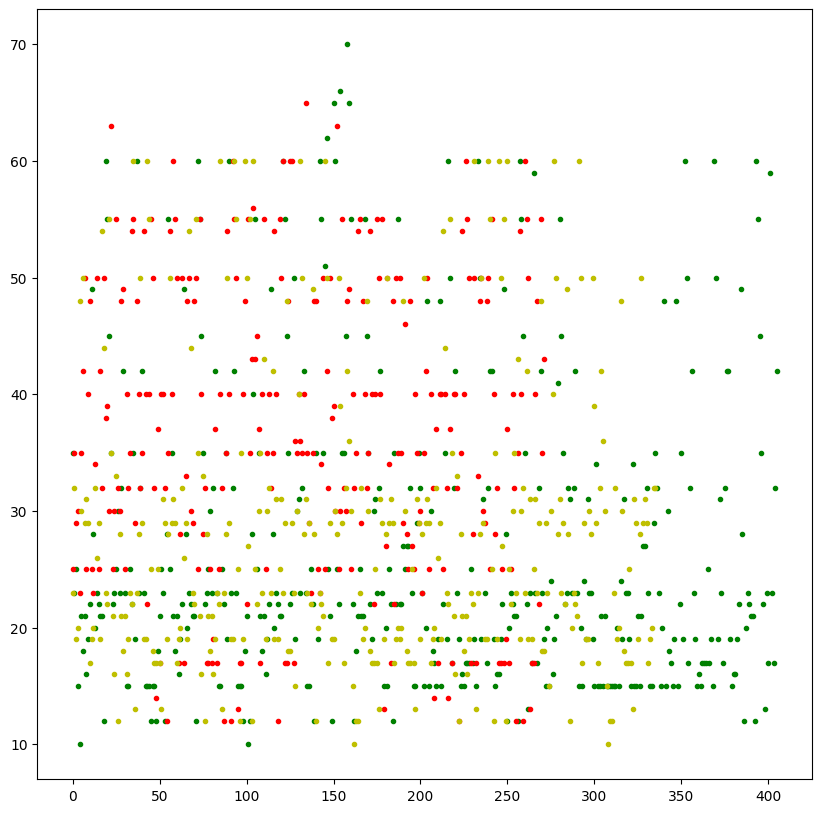

In [2]:
# importando a biblioteca responsavel por plotar as coisas
from matplotlib import pyplot as plt

# tamanho da figura na plotagem, acho que em rem, ou cm sla, px n é
plt.figure(figsize=(10, 10))

# vamos lá, basicamente o atb1 e atb2 são os atributos que vão ser plotados no grafico, e o label1 e label2 são basicamente 
# a corzinha, ou seja, de qual classe (nesse caso) o tal dado dos atbs pertencem

# atributo idade que vou plotar no grafico, e vou diferenciar em idade que tem high risk ou low risk
atb1=0

# os labels são basicamente a classe que vao ser plotadas
label1 = data[:, -1] == 'low risk' 
label2 = data[:, -1] == 'high risk'
label3 = data[:, -1] == 'mid risk'


print(label1)

plt.plot(data[label1, atb1], '.g')

plt.plot(data[label2, atb1], '.r')

plt.plot(data[label3, atb1], '.y')


# Classificação
> Encontrar a melhor configuração de parâmetros que maixmiza os resultados do algoritmo de classificação Árvore de Decisão e Rede Neural.


1.   Separar os dados em treino (60%), validação (10%) e teste (30%)
2.   Utilizando o Conjunto de Treino e Validação, tentar encontrar os melhores parâmetros.
3. Avaliar o `melhor` conjunto de parâmetros encontrado com o conjunto de `Teste`.

> Algoritmos:
 - (Rede Neural) from sklearn.neural_network import MLPClassifier -> `MLPClassifier`
 - (Árvore de Decisão) from sklearn import tree -> `DecisionTreeClassifier`



## Divisão do dataset em 3 partes
> [LINK](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do material para realizar a divisão.

In [3]:
print(data[:,:-1])

[[25 130 80 15.0 98.0 86]
 [35 140 90 13.0 98.0 70]
 [29 90 70 8.0 100.0 80]
 ...
 [35 85 60 19.0 98.0 86]
 [43 120 90 18.0 98.0 70]
 [32 120 65 6.0 101.0 76]]


In [15]:
#Dividir o Dataset em 3 partes, pra isso pega a biblioteca do sklearn que divide entre treino e teste, e faz isso 2x pra conseguir treino, validação e teste
from sklearn.model_selection import train_test_split

#divide entre treino (60% treino + 10% validação) e teste (30% teste)
#test_size é o tamanho do teste e random_state é tipo uma "seed" para a divisão dos dados, pra poder ser replicável.
# nesse caso, o data[:,:-1] pega todos os valores dos atbs, MENOS a classe
# e o data[:,-1] pega só as linhas da classe
X_train, X_test, y_train, y_test = train_test_split(data[:,:-1], data[:,-1], test_size=0.3, random_state=2004)

# printando os valores de teste para cada classe, ou seja, a qtde de linhas para cada classe
print(f'Teste\nQuantidade Classe 0 (low risk): {np.sum(y_test == "low risk")}')
print(f'Quantidade Classe 1 (mid risk): {np.sum(y_test == "mid risk")}')
print(f'Quantidade Classe 2 (high risk): {np.sum(y_test == "high risk")}')


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# printando os valores de treino para cada classe, ou seja, a qtde de linhas para cada classe
print(f'Treino\n  Quantidade Classe 0 (low risk): {np.sum(y_train == "low risk")}')
print(f'  Quantidade Classe 1 (mid risk): {np.sum(y_train == "mid risk")}')
print(f'  Quantidade Classe 2 (high risk): {np.sum(y_train == "high risk")}')

# printando os valores de validação para cada classe, ou seja, a qtde de linhas para cada classe
print(f'Validação\n  Quantidade Classe 0 (low risk): {np.sum(y_val == "low risk")}')
print(f'  Quantidade Classe 1 (mid risk): {np.sum(y_val == "mid risk")}')
print(f'  Quantidade Classe 2 (high risk): {np.sum(y_val == "high risk")}')


# print('Treino\n QTD Class 0:',np.sum(y_train==0.0),' QTD Class 1:',np.sum(y_train==1.0))
# print('Teste\n QTD Class 0:',np.sum(y_test==0.0),' QTD Class 1:',np.sum(y_test==1.0))

treino = np.concatenate((X_train, y_train.reshape(-1,1)), axis=1) #dados de treino
val = np.concatenate((X_val, y_val.reshape(-1,1)), axis=1) #dados de validação
teste = np.concatenate((X_test, y_test.reshape(-1,1)), axis=1) #dados de teste


print(f'Treino: {treino.shape}, Validação: {val.shape}, Teste: {teste.shape}')

Teste
Quantidade Classe 0 (low risk): 116
Quantidade Classe 1 (mid risk): 103
Quantidade Classe 2 (high risk): 86
Treino
  Quantidade Classe 0 (low risk): 269
  Quantidade Classe 1 (mid risk): 209
  Quantidade Classe 2 (high risk): 160
Validação
  Quantidade Classe 0 (low risk): 21
  Quantidade Classe 1 (mid risk): 24
  Quantidade Classe 2 (high risk): 26
Treino: (638, 7), Validação: (71, 7), Teste: (305, 7)


## Árvore de Decisão

Utilizando Árvore de Decisão para criação de um algoritmo classificador

acc: 0.8309859154929577
acc: 0.7934426229508197


array([[70,  4, 12],
       [ 0, 96, 20],
       [12, 15, 76]], dtype=int64)

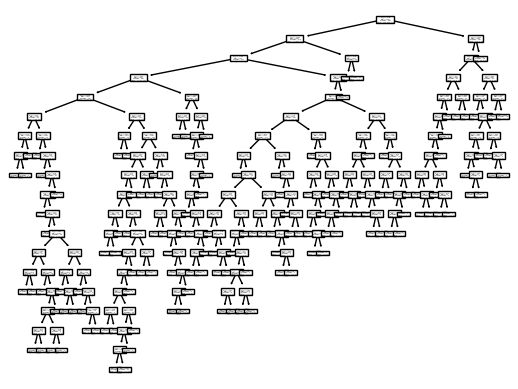

In [94]:
# importando árvore de decisão, matriz de confusão, e pontuação de precisão (acurácia)
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import accuracy_score

treino_dados = treino[:,:-1] #Dados desconsiderando o atributo CLASSE
treino_classes = treino[:,-1] #Dados considerando apenas o atributo CLASSE

clf = tree.DecisionTreeClassifier(max_depth=100, random_state=2004)
clf = clf.fit(treino_dados, treino_classes)

#Avaliando o modelo com os dados de Validação (Aprendeu ou decorou?)
y_pred = clf.predict(val[:,:-1]) #Desconsiderando o atributo classe de VAL
acc = accuracy_score(val[:,-1], y_pred)
print('acc:',acc)
tree.plot_tree(clf)

#Avaliando o modelo com os dados de Teste (Realmente está bom?)
y_pred = clf.predict(teste[:,:-1]) #Desconsiderando o atributo classe de VAL
acc = accuracy_score(teste[:,-1], y_pred)
print('acc:',acc)
tree.plot_tree(clf)

#Verificando os acertos de cada classe com a matriz de confusão:
confusion_matrix(teste[:,-1], y_pred)

## Rede Neural
[LINK](https://scikit-learn.org/dev/modules/neural_networks_supervised.html#multi-layer-perceptron) material do sklearn para utilizar a rede neural

In [177]:
#Rede Neural 
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam',learning_rate_init=0.005,hidden_layer_sizes=(12, 16, 10, 8, 18, 10), random_state=2004, max_iter=1000)
clf = clf.fit(treino_dados, treino_classes)

#Avaliando o modelo com os dados de Validação (Aprendeu ou decorou?)
y_pred = clf.predict(val[:,:-1]) #Desconsiderando o atributo classe de VAL
acc = accuracy_score(val[:,-1], y_pred)
print('acc:', acc)


#Avaliando o modelo com os dados de Validação (Aprendeu ou decorou?)
y_pred = clf.predict(teste[:,:-1]) #Desconsiderando o atributo classe de VAL
acc = accuracy_score(teste[:,-1], y_pred)
print('acc:',acc)

#Verificando os acertos de cada classe com a matriz de confusão:
confusion_matrix(teste[:,-1], y_pred)

acc: 0.6197183098591549
acc: 0.5934426229508196


array([[66, 11,  9],
       [ 1, 57, 58],
       [20, 25, 58]], dtype=int64)